<a href="https://colab.research.google.com/github/boppanr/AgenticAI/blob/main/AgenticAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction & Motivation**

The integration of Generative AI (GenAI) and Large Language Models (LLMs) has significantly transformed the healthcare sector by enabling advanced natural language processing, improving access to medical information, and streamlining patient interactions. AI-powered solutions can assist in diagnosing conditions, providing health recommendations, and offering 24/7 support to patients.

Despite the abundance of medical knowledge, accessing personalized and reliable health information remains a challenge. Many existing healthcare systems provide generic responses and lack contextual awareness. HealthSense AI is designed to bridge this gap by leveraging LLMs and the LangChain framework to offer intelligent, context-aware health information assistance.

\

---

\

## **Problem Statement**

*Develop an intelligent healthcare platform that streamlines medical service discovery and booking by analyzing hospital data, reviews, and healthcare metrics.*

*The system will extract and compare key parameters to help users make informed healthcare decisions.
The solution will feature a comprehensive comparison engine for hospitals and diagnostic centers, an automated slot booking system, and detailed information about medical tests and procedures. The platform will incorporate a user-friendly chat interface to hospital comparisons, explore healthcare metrics, and facilitate seamless appointment scheduling.*

\

---

\

## **Core Objectives**

- **Implement Natural Language Processing (NLP)** – Accurately interpret and process medical terminology.
- **Develop Context-Aware Responses** – Maintain dialogue history for better interaction continuity.
- **Enable Multi-Source Integration** – Pull data from reliable medical knowledge bases.
- **Provide Real-Time Doctor and Hospital Recommendations** – Offer users relevant medical support.
- **Ensure Compliance and Ethical AI** Usage – Maintain HIPAA and GDPR compliance.

For more details, refer to [project documentation](https://drive.google.com/file/d/1X7ubJkXtR5fUju0Jca2_IT3XvJArp2MV/view?usp=sharing)


\

---

\




---



## **Step 1. Install necessary libraries**

---



* **httpx:** A modern HTTP client for making API requests, used for efficient networking.
* l**angchain:** Core LangChain library for building LLM-powered applications.
* **langchain_core:** Essential components for LangChain, including memory, chains, and agents.
* **langchain_openai:** OpenAI-specific integration for using GPT-based models with LangChain.
* **langchain_experimental:** Additional experimental LangChain features and extensions.

In [2]:
# Installing required Python libraries for building the AI-driven hospital comparison agent

!pip install httpx langchain langchain_core langchain_openai langchain_experimental langchain-community


INFO: pip is looking at multiple versions of langchain-openai to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


### **Importing Necessary Libraries**

In [1]:
# Import necessary libraries
import sqlite3  # ✅ SQLite database module for lightweight relational database management
import pandas as pd  # ✅ Pandas for handling and manipulating tabular data
import httpx  # ✅ HTTP client for making API calls

# Import LangChain components for AI agent execution
from langchain.agents import AgentExecutor, create_openai_tools_agent  # ✅ Used to create and run an AI agent
from langchain.chains import LLMChain  # ✅ Creates a language model pipeline for processing queries
from langchain.memory import ConversationBufferMemory  # ✅ Maintains conversational memory for better AI interactions

# Import SQL-related tools for integrating AI with databases
from langchain_community.agent_toolkits import SQLDatabaseToolkit  # ✅ A toolkit for managing SQL database interactions
from langchain_community.agent_toolkits.sql.prompt import SQL_FUNCTIONS_SUFFIX  # ✅ SQL function templates for LangChain
from langchain_community.utilities import SQLDatabase  # ✅ Utility for connecting AI models to SQL databases

# Import core message handling components
from langchain_core.messages import AIMessage  # ✅ AI-generated message object for structured conversations

# Import ChatPrompt components for structured AI prompting
from langchain_core.prompts.chat import (
    ChatPromptTemplate,  # ✅ Template for defining AI chat prompts
    HumanMessagePromptTemplate,  # ✅ Template to structure user inputs for AI processing
    MessagesPlaceholder,  # ✅ Placeholder to dynamically include conversation history
)

# Import OpenAI LLM model interface
from langchain_openai import ChatOpenAI  # ✅ Interface for using OpenAI's ChatGPT-like language models

## **Step 2. Add OpenAI API Key**

---


### **📌 Best Practices for API Key Safety**


1. Always use a unique API key for each team member on your account
2. Never deploy your key in client-side environments like browsers or mobile apps
3. Never commit your key to your repository
4. Use Environment Variables in place of your API key
5. Use a Key Management Service
6. Monitor your account usage and rotate your keys when needed



In [3]:
# Importing getpass to securely handle user input (e.g., API keys or passwords).
import getpass

# Prompting the user to securely enter their OpenAI API key without displaying it on the screen
OPENAI_API_KEY = getpass.getpass("Enter your OpenAI API key: ")
import os

# Setting the OpenAI API key as an environment variable.
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

# ✅ Specify the LLM model name (Ensure compatibility with your use case)
LLM_MODEL_NAME = "gpt-4o-2024-08-06"  # Example: Use "gpt-4-turbo" or "gpt-3.5-turbo" if needed.

# 🔴 IMPORTANT SECURITY WARNING:
# - Never share this key publicly.
# - Avoid hardcoding in scripts; use environment variables instead.
# - For production deployments, consider using a vault or key management system.


# ✅ Verifying API Key Setup
if os.getenv("OPENAI_API_KEY"):
    print("✅ OpenAI API Key successfully set as an environment variable.")
else:
    print("❌ Error: API Key not found! Please check your configuration.")


Enter your OpenAI API key: ··········
✅ OpenAI API Key successfully set as an environment variable.


## **Step 3. Load the CSV file into a Pandas DataFrame**

---


#### **1. Define Dataset Paths**

#### **🛠 How to Upload Files in Google Colab?**

- Open Google Colab.
- Click on the folder icon 📂 on the left sidebar.
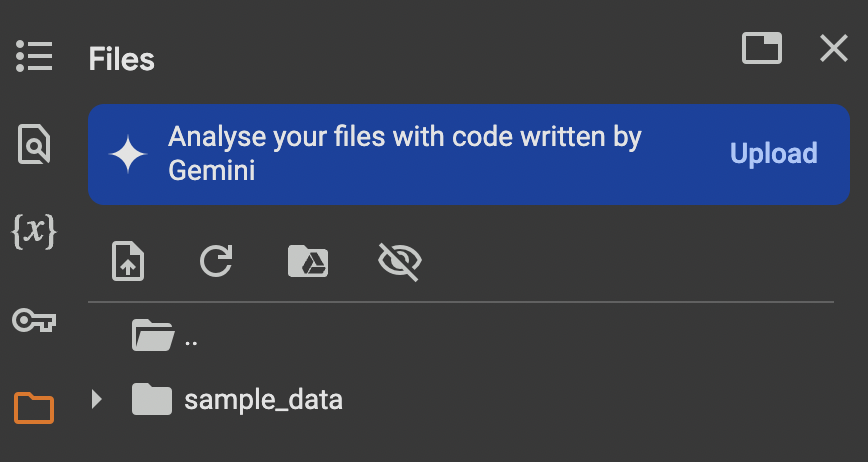
- Click Upload and select doctors_info_data.csv and doctors_slots_data.csv from your computer.
- Verify that the files appear in the Colab File Explorer before running the code.


For further details check [here.](https://saturncloud.io/blog/how-to-read-csv-to-dataframe-in-google-colab/)

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
# Define dataset paths (Ensure these files exist in the correct directory)
DOCTORS_INFO_PATH = "/content/gdrive/MyDrive/doctors_info_data.csv"
SLOTS_INFO_PATH = "/content/gdrive/MyDrive/doctors_slots_data.csv"

#### **2. Check if Files Exist Before Loading**

#### **3. Load Datasets into Pandas DataFrames**

In [6]:
# Load datasets only if files exist
if os.path.exists(DOCTORS_INFO_PATH):
    df_doctors = pd.read_csv(DOCTORS_INFO_PATH)
    print("✅ Doctors dataset loaded successfully!")

if os.path.exists(SLOTS_INFO_PATH):
    df_slots = pd.read_csv(SLOTS_INFO_PATH)
    print("✅ Doctors' slots dataset loaded successfully!")

✅ Doctors dataset loaded successfully!
✅ Doctors' slots dataset loaded successfully!


## **Step 4. Explore Doctor Info and Doctor Slots Data**

---


#### **1. Display First 5 Rows of Each Dataset**

In [7]:
# Display first few rows to verify successful loading
print("\n Doctor Dataset Preview:")
display(df_doctors.head())


 Doctor Dataset Preview:


,id,name,specialization,contact
0,0,William Johnson,Nephrology,9820270096
1,1,Charles Lopez,Orthopedics,1136745685
2,2,Nancy Martinez,Ophthalmology,6450886039
3,3,Sarah Anderson,Cardiology,3235538419
4,4,Maria Gonzalez,Ophthalmology,5826401703


In [8]:
print("\n Doctor Slots Dataset Preview:")
display(df_slots.head())


 Doctor Slots Dataset Preview:


,id,doctor_id,datetime,is_available
0,0,0,2025-03-01 8:00 AM,1
1,1,0,2025-03-01 8:30 AM,1
2,2,0,2025-03-01 9:00 AM,1
3,3,0,2025-03-01 9:30 AM,1
4,4,0,2025-03-01 10:00 AM,1


#### **2. Verify Basic Dataset Information & Display Basic Dataset Statistics**

In [9]:
# Get an overview of each dataset’s structure
print("\n Doctors Dataset Info:")
df_doctors.info()

# Helps users quickly understand numerical distributions
print("\n Doctors Dataset Statistics:")
display(df_doctors.describe())


 Doctors Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28 non-null     int64 
 1   name            28 non-null     object
 2   specialization  28 non-null     object
 3   contact         28 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB

 Doctors Dataset Statistics:


,id,contact
count,28.000000,2.800000e+01
mean,13.500000,4.938698e+09
std,8.225975,2.929617e+09
min,0.000000,5.335206e+08
25%,6.750000,2.508814e+09
50%,13.500000,5.291659e+09
75%,20.250000,7.547455e+09
max,27.000000,9.820270e+09


In [10]:
# Get an overview of each dataset’s structure
print("\n Doctors' Slots Dataset Info:")
df_slots.info()

# Helps users quickly understand numerical distributions
print("\nDoctors' Slots Dataset Statistics:")
display(df_slots.describe())


 Doctors' Slots Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3024 non-null   int64 
 1   doctor_id     3024 non-null   int64 
 2   datetime      3024 non-null   object
 3   is_available  3024 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 94.6+ KB

Doctors' Slots Dataset Statistics:


,id,doctor_id,is_available
count,3024.000000,3024.000000,3024.000000
mean,1511.500000,13.500000,0.676587
std,873.097933,8.079083,0.467856
min,0.000000,0.000000,0.000000
25%,755.750000,6.750000,0.000000
50%,1511.500000,13.500000,1.000000
75%,2267.250000,20.250000,1.000000
max,3023.000000,27.000000,1.000000


#### **3. Distribution of Available Doctor Slots**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")  # Ignore all warnings

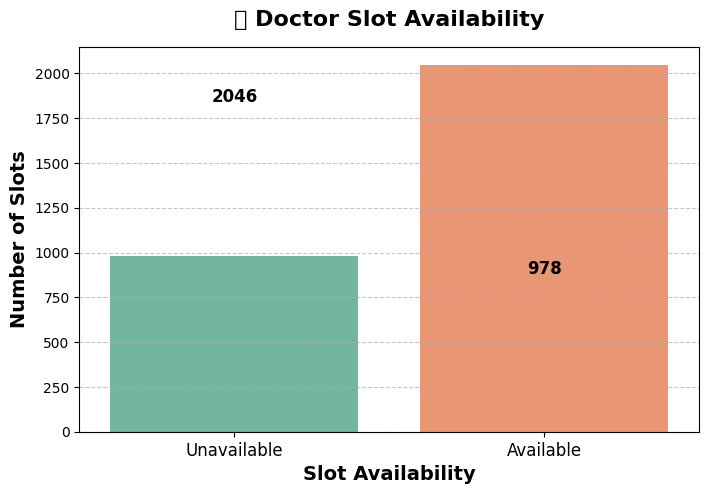

In [12]:
# ✅ Count the number of available and unavailable slots
slot_availability = df_slots['is_available'].value_counts()

# ✅ Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=slot_availability.index, y=slot_availability.values, palette="Set2")

# ✅ Improve aesthetics
plt.xticks(ticks=[0, 1], labels=["Unavailable", "Available"], fontsize=12)
plt.xlabel("Slot Availability", fontsize=14, fontweight='bold')
plt.ylabel("Number of Slots", fontsize=14, fontweight='bold')
plt.title("📊 Doctor Slot Availability", fontsize=16, fontweight='bold', pad=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ✅ Display values on top of bars with proper positioning
for i, v in enumerate(slot_availability.values):
    ax.text(i, v - (v * 0.1), f"{v}", ha='center', fontsize=12, fontweight='bold', color='black')

plt.show()

#### **4. Bar Chart: Number of Doctors by Specialization**

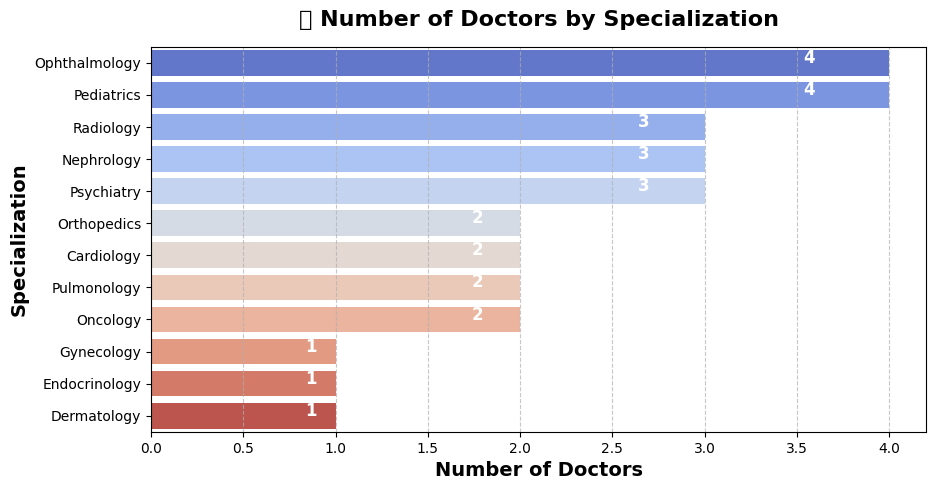

In [13]:
# ✅ Count the number of doctors in each specialization
specialization_counts = df_doctors['specialization'].value_counts()

# ✅ Create bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=specialization_counts.index, x=specialization_counts.values, palette="coolwarm")

# ✅ Improve aesthetics
plt.xlabel("Number of Doctors", fontsize=14, fontweight='bold')
plt.ylabel("Specialization", fontsize=14, fontweight='bold')
plt.title("🏥 Number of Doctors by Specialization", fontsize=16, fontweight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# ✅ Display values inside bars for better readability
for i, v in enumerate(specialization_counts.values):
    ax.text(v - (v * 0.1), i, str(v), ha='right', fontsize=12, fontweight='bold', color='white')

plt.show()

## **Step. Setup SQL Database**

---


#### **1. Establish Connection to SQLite Database**

We begin by creating a connection to an SQLite database file named appointments.db. If the file doesn’t exist, it will be automatically created.

In [15]:
# ✅ Establish connection to SQLite database (or create if it doesn't exist)
conn = sqlite3.connect("appointments.db")
cursor = conn.cursor()

#### **2. Create Required Tables**

We define two tables:

- **doctors** → Stores doctor details (ID, name, specialization, and contact info).
- **slots** → Stores appointment slots, linking to the doctor via doctor_id.

Each table is created only if it does not already exist to prevent overwriting data.

In [16]:
# ✅ Create 'doctors' table to store doctor details

cursor.execute("""
CREATE TABLE IF NOT EXISTS doctors (
    id INTEGER,
    name TEXT NOT NULL,
    specialization TEXT NOT NULL,
    contact TEXT NOT NULL
)
""")

# ✅ Create 'slots' table to store available appointments
cursor.execute("""
CREATE TABLE IF NOT EXISTS slots (
    id INTEGER,
    doctor_id INTEGER NOT NULL,
    datetime TEXT NOT NULL,
    is_available BOOLEAN NOT NULL
)
""")

#### **3. Insert Data into SQL Tables**

Once the tables are set up, we load data from our Pandas DataFrames into the SQL database.

- **df_doctors.to_sql**("doctors", conn, if_exists="replace", index=False)
→ Loads doctor data, replacing old records if they exist.

- **df_slots.to_sql**("slots", conn, if_exists="replace", index=False)
→ Loads appointment slot data in the same way.

In [17]:
# ✅ Insert doctor and appointment slot data from Pandas DataFrames into the database
df_doctors.to_sql("doctors", conn, if_exists="replace", index=False)

28

In [18]:
df_slots.to_sql("slots", conn, if_exists="replace", index=False)
print("✅ Database setup complete. Doctors and Slots data inserted successfully!")

✅ Database setup complete. Doctors and Slots data inserted successfully!


**🛠️ Why This Step Matters?**

- Ensures data integrity by storing structured doctor and appointment data.
- Facilitates efficient querying for appointment booking, availability checks, and doctor searches.
- Provides a scalable solution—we can easily extend the database to support more features like patient records, booking history, and payments.

🚀 Now, the database is all set up and populated—ready for the next steps!

## **Step 6. Initialize model memory**

---


#### **1. Understanding Model Memory**

When working with Conversational AI, we often need the model to remember previous interactions to provide more contextually relevant responses.

- We use **ConversationBufferMemory**, which stores past conversations to help the model generate coherent responses based on previous exchanges.
- Without memory, the model treats each query as independent, leading to disjointed conversations.

In [20]:
memory = ConversationBufferMemory(memory_key="history")

#### **2. Setting Up the Language Model (LLM)**

- We instantiate ChatOpenAI from langchain_openai, which serves as the core model for processing user queries.

- **Key parameters:**
  - `temperature=0` → Ensures deterministic responses (useful for factual tasks like healthcare recommendations).
  - `max_tokens=500` → Limits the response length to 500 tokens, preventing excessive text generation.
  - `http_client=httpx.Client(verify=False)` → Used to handle API requests securely.

In [19]:
llm = ChatOpenAI(temperature=0, max_tokens=500, http_client = httpx.Client(verify=False))

## **Step 7. Connect SQLDatabase Agent**

---


#### **1. What is the SQLDatabaseToolkit?**

At its core, the SQLDatabaseToolkit allows seamless interaction with a SQL database. Instead of manually writing queries, this toolkit automates the process by leveraging an LLM-powered agent to handle:

✅ Query execution – Fetching relevant data without writing raw SQL manually

✅ Database management – Updating records, retrieving insights, and analyzing database content

✅ Smart SQL interpretation – Understanding user queries and dynamically generating the appropriate SQL

#### **2. Establish Database Connection**

- We initialize the SQLDatabase by connecting to the appointments.db SQLite database.
- This allows the AI agent to query and modify the stored hospital and doctor appointment data.

In [21]:
db = SQLDatabase.from_uri("sqlite:///appointments.db")

#### **3. Set Up the SQL Toolkit**

- The SQLDatabaseToolkit serves as a bridge between the database (db) and the LLM (llm).
- It provides built-in tools to enable efficient SQL execution without requiring manual query writing.

In [22]:
# ✅ Initialize the SQL Toolkit to enable AI-driven database interaction
toolkit = SQLDatabaseToolkit(db=db, llm=llm)

# ✅ Retrieve the execution context for generating intelligent queries
context = toolkit.get_context()

# ✅ Extract available tools from the toolkit (e.g., data retrieval, updates)
tools = toolkit.get_tools()

#### **4. Define AI Prompting Strategy**


- We design a prompt template that defines how the agent should process user queries.

- **Key Enhancements:**
  - {input} → Placeholder for dynamic user input.
- SQL Guidelines → Instructs the AI to:
  - Use LIKE operator (for flexible name searches).
  - Handle case-insensitive name matching.
  - Delete rows when users request slot booking.
  

In [23]:
# ✅ Define AI interaction with database using a structured prompt template
messages = [
    HumanMessagePromptTemplate.from_template("{input}"),  # Dynamic user query input
    AIMessage(content=SQL_FUNCTIONS_SUFFIX + "\nUse LIKE operator with lowercase when matching a name.\n"
               "When a user requests to book slots, delete the corresponding row from the table.\n"),
    MessagesPlaceholder(variable_name="agent_scratchpad")  # Placeholder for agent memory
]

#### **5. Construct the AI-Powered SQL Agent**

- **Step 1:** Convert messages into a structured prompt
- **Step 2:** Inject execution context (to ensure AI understands database structure)
- **Step 3:** Initialize the LLM-powered SQL Agent
- **Step 4:** Assign necessary tools (querying, record updates, etc.)

In [24]:
# ✅ Convert messages into an AI-interpretable prompt
prompt = ChatPromptTemplate.from_messages(messages)

# ✅ Embed contextual information about the database structure
prompt = prompt.partial(**context)

# ✅ Create an AI-powered SQL agent capable of intelligent query execution
agent = create_openai_tools_agent(llm, tools, prompt)

#### **6. Deploy the Agent Executor**

- The **AgentExecutor** ensures that the AI executes SQL tasks dynamically.
- It interacts with the **SQLDatabaseToolkit**, processing queries and updating records in real time.
- Setting `verbose=True` enables debugging and transparency in SQL execution.

In [25]:
# ✅ Deploy the AI-powered SQL agent for dynamic database interactions
agent_executor = AgentExecutor(
    agent=agent,          # Assign AI agent
    tools=toolkit.get_tools(),  # Provide tools for execution
    verbose=True  # Enable logging for debugging and tracking executions
)

**🛠️ Why Is This Step Important?**

- Eliminates manual SQL writing – AI dynamically generates queries based on user input.
- Enhances searchability – Uses case-insensitive and pattern-matching techniques (LIKE).
- Automates slot booking – The AI modifies the database when an appointment is booked.
- Ensures real-time database interaction – The agent can retrieve and update data dynamically.

[Reference](https://python.langchain.com/docs/integrations/tools/sql_database/)

## **Step 8. Run Examples**



---



**Executing an AI-Powered SQL Query**

Now that our SQL agent is set up, we can test its functionality with a sample query.

In [27]:
# ✅ Sample user input request
user_input = 'book 3PM slots for Dr. Lee'

In [29]:
# ✅ Invoke the AI agent to process the request and execute the SQL operation
output = agent_executor.invoke({"input": user_input})



> Entering new AgentExecutor chain...

Invoking: `sql_db_list_tables` with `{}`


doctors, slots
Invoking: `sql_db_schema` with `{'table_names': 'doctors'}`



CREATE TABLE doctors (
	id INTEGER, 
	name TEXT, 
	specialization TEXT, 
	contact INTEGER
)

/*
3 rows from doctors table:
id	name	specialization	contact
0	William Johnson	Nephrology	9820270096
1	Charles Lopez	Orthopedics	1136745685
2	Nancy Martinez	Ophthalmology	6450886039
*/
Invoking: `sql_db_schema` with `{'table_names': 'slots'}`



CREATE TABLE slots (
	id INTEGER, 
	doctor_id INTEGER, 
	datetime TEXT, 
	is_available INTEGER
)

/*
3 rows from slots table:
id	doctor_id	datetime	is_available
0	0	2025-03-01 8:00 AM	1
1	0	2025-03-01 8:30 AM	1
2	0	2025-03-01 9:00 AM	1
*/
Invoking: `sql_db_query` with `{'query': "SELECT * FROM doctors WHERE LOWER(name) LIKE '%lee%'"}`
responded: The database contains two tables: `doctors` and `slots`.

Here is the schema and sample data for the `doctors` table:
- **doctors**:
  - id (INTEGER)
 

In [30]:
# ✅ Display the AI-generated response
print(output['output'])

I have successfully booked the 3 PM slot for Dr. Linda Lee. The slot has been reserved.


**What Happens Here?**

1. The user requests a 3 PM appointment with Dr. Lee.

2. **The AI agent:**

- Searches for available slots in the database.
- If available, books the slot (removes the entry).
- If unavailable, informs the user.

3. **The output** is returned and displayed.

### **References**
1. https://medium.com/@LawrencewleKnight/build-your-first-sql-database-agent-with-langchain-19af8064ae18
2. https://python.langchain.com/v0.1/docs/use_cases/sql/agents/
3. https://python.langchain.com/docs/integrations/tools/sql_database/

## **Next Steps**


- **Week 5:** Build Emergency & Diagnostics Agents for real-time medical assistance.
- **Week 6:** Implement Crew AI for multi-agent coordination.
- **Week 7:** Develop FastAPI backend, UI, and deployment setup.
- **Week 8:** Finalize documentation, logging, and performance testing.


---
#  -----------------------------------------------------  **THANK YOU** ------------------------------------------------------------




---